# Locally Weighted Regression
- Read and normalize the dataset
- Generate w for every point
- Calculate the theta directly using closed form solution
- Find the best tau (hyperparameter) [Cross Validation]

In [150]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [151]:
dfx = pd.read_csv('Datasets/weightedX.csv')
dfy = pd.read_csv('Datasets/weightedY.csv')

In [152]:
X = dfx.values
Y = dfy.values

In [153]:
print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


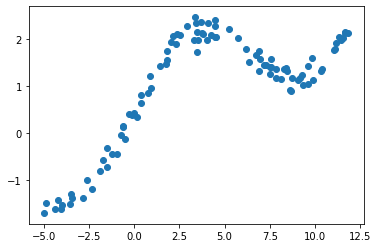

In [154]:
plt.figure()
plt.scatter(X, Y)
plt.show()

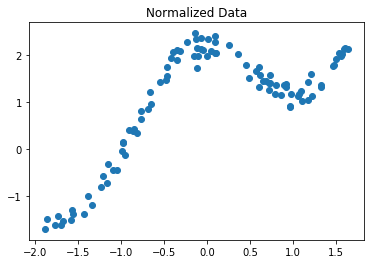

In [155]:
#Normalize
X = (X - X.mean())/X.std()

plt.title("Normalized Data")
plt.scatter(X, Y)
plt.show()

## Calculating w

In [156]:
def getW(query_pt, X, tau):
    m = X.shape[0]
    W = np.mat(np.eye(m))

    for i in range(m):
        diff = np.dot((query_pt - X[i]), (query_pt - X[i]).T)
        pow = diff/(-2 * tau * tau)
        W[i, i] = np.exp(pow)

    return W

In [157]:
X = np.mat(X)
Y = np.mat(Y)

W = getW(-1, X, 1)
print(W.shape)
print(W) 

(99, 99)
[[0.81327022 0.         0.         ... 0.         0.         0.        ]
 [0.         0.98353311 0.         ... 0.         0.         0.        ]
 [0.         0.         0.81193405 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.59936711 0.         0.        ]
 [0.         0.         0.         ... 0.         0.2758226  0.        ]
 [0.         0.         0.         ... 0.         0.         0.08496804]]


In [158]:
W = getW(-1, X, 100)
print(W.shape)
print(W) 

# More tau (Bandwidth) means more pts will affect the theta 
# Becomes Identity Matrix ==> W = 1 i.e. LOWESS will become Linear Regression

(99, 99)
[[0.99997933 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99999834 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99997917 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99994881 0.         0.        ]
 [0.         0.         0.         ... 0.         0.99987121 0.        ]
 [0.         0.         0.         ... 0.         0.         0.99975348]]


## Making Prediction

In [159]:
X_ = X

print(X_.shape)

(99, 1)


In [163]:
def predict(X, Y, query_x, tau):
    ones = np.ones((X.shape[0], 1))
    X_ = np.hstack((X, ones))
    
    qx = np.mat([query_x, 1])
    W = getW(qx, X_, tau)

    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred = np.dot(qx, theta)
    return theta, pred 

In [164]:
theta, pred = predict(X, Y, 1, 1)
print(pred)

[[1.59417694]]


In [162]:
print(type(X))

<class 'numpy.matrix'>


## Visualize

In [179]:
def plotPred(tau):
    X_test = np.linspace(-2, 2, 50)
    Y_test = []

    for xq in X_test:
        theta, pred = predict(X, Y, xq, tau)
        Y_test.append(pred)

    Y_test = np.array(Y_test)

    XO = np.array(X)
    YO = np.array(Y)

    plt.title("tau value %0.3f" %tau)
    plt.scatter(XO, YO)
    plt.scatter(X_test, Y_test, color="red")
    plt.show()

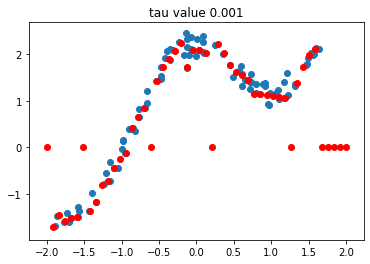

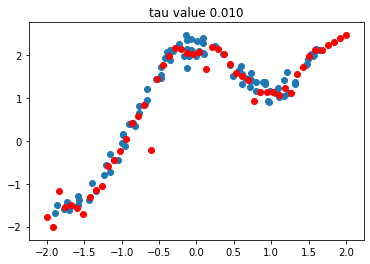

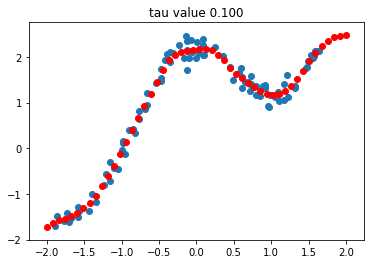

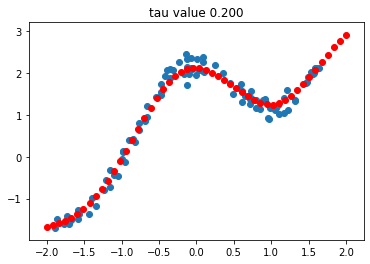

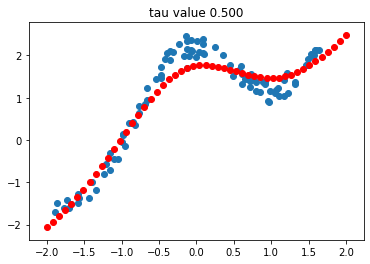

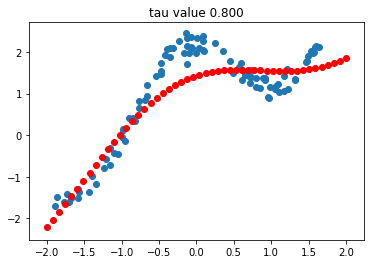

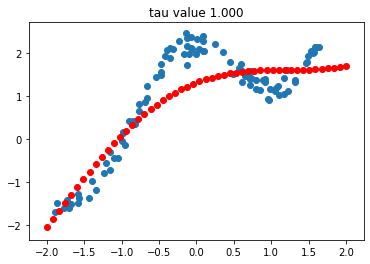

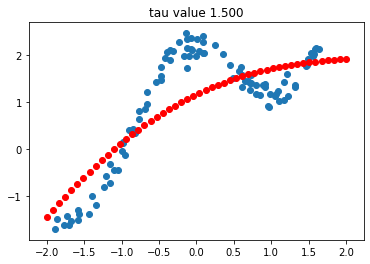

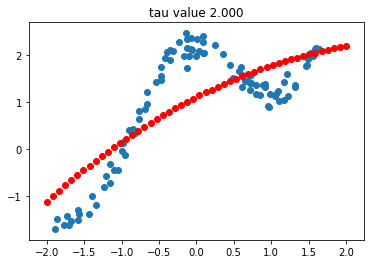

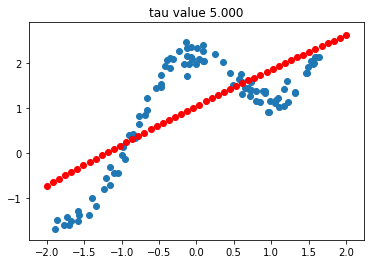

In [180]:
taus = [0.001, 0.01, 0.1, 0.2, 0.5, 0.8, 1, 1.5, 2, 5]
for tau in taus:
    plotPred(tau)

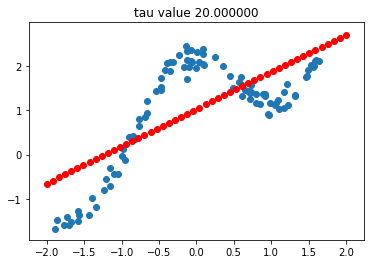

In [176]:
plotPred(20)